# Lottery Dataset

## Cleaning the data

First, we import the packages we need

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Second, we import the actual dataset. The dataset comes from a txt-file which has uneven spaces between columns and a comment at the beginning. We use an argumet 'skiprows = 4' to remove the comment. 

In [118]:
data = pd.read_csv('LotteryData2.txt', sep = " ", skiprows = 4, header = None)

In [119]:
print(data.shape)

(1329, 74)


We see that the dimensions of the dataset has correct number of rows (514), however the number of columns is incorrect due to uneven number of spaces in the original file. We look at the data and see that some columns have NaN values: 

In [120]:
print(data.head())

     0   1   2   3   4     5    6    7     8   9  ...  64  65  66  67  68  69  \
0  1329 NaN NaN NaN NaN  Fri.  Mar  16,  2018 NaN ... NaN NaN NaN NaN  11 NaN   
1  1328 NaN NaN NaN NaN  Tue.  Mar  13,  2018 NaN ... NaN NaN NaN NaN  17 NaN   
2  1327 NaN NaN NaN NaN  Fri.  Mar  09,  2018 NaN ... NaN NaN NaN NaN  22 NaN   
3  1326 NaN NaN NaN NaN  Tue.  Mar  06,  2018 NaN ... NaN NaN NaN NaN  22 NaN   
4  1325 NaN NaN NaN NaN  Fri.  Mar  02,  2018 NaN ... NaN NaN NaN NaN   8 NaN   

   70  71  72  73  
0 NaN NaN NaN NaN  
1 NaN NaN NaN NaN  
2 NaN NaN NaN NaN  
3 NaN NaN NaN NaN  
4 NaN NaN NaN NaN  

[5 rows x 74 columns]


We remove columns with NaNs using .dropna() method. 

In [121]:
data = data.dropna(axis = 1, how = 'all')
print(data.head())
print(data.shape)

     0     5    6    7     8   18  28  38  48  58  68
0  1329  Fri.  Mar  16,  2018  26  52  33   1  13  11
1  1328  Tue.  Mar  13,  2018   6  30  61  60  58  17
2  1327  Fri.  Mar  09,  2018  18  46  17  66   7  22
3  1326  Tue.  Mar  06,  2018   1   4  39  35  26  22
4  1325  Fri.  Mar  02,  2018  60  64  28  24  42   8
(1329, 11)


In [122]:
data.columns = ['Draw','WeekDay', 'Month', 'Day', 'Year', '1', '2', '3', '4', '5', 'Mega']

In [123]:
print(data.head())

   Draw WeekDay Month  Day  Year   1   2   3   4   5  Mega
0  1329    Fri.   Mar  16,  2018  26  52  33   1  13    11
1  1328    Tue.   Mar  13,  2018   6  30  61  60  58    17
2  1327    Fri.   Mar  09,  2018  18  46  17  66   7    22
3  1326    Tue.   Mar  06,  2018   1   4  39  35  26    22
4  1325    Fri.   Mar  02,  2018  60  64  28  24  42     8


In [124]:
data['Day'] = data['Day'].apply(lambda x: str(x).rstrip(','))
print(data.head())

   Draw WeekDay Month Day  Year   1   2   3   4   5  Mega
0  1329    Fri.   Mar  16  2018  26  52  33   1  13    11
1  1328    Tue.   Mar  13  2018   6  30  61  60  58    17
2  1327    Fri.   Mar  09  2018  18  46  17  66   7    22
3  1326    Tue.   Mar  06  2018   1   4  39  35  26    22
4  1325    Fri.   Mar  02  2018  60  64  28  24  42     8


In [125]:
from time import strptime
data['Month'] = data['Month'].apply(lambda x: strptime(x,'%b').tm_mon)


In [126]:
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], format = '%Y%M%D')
data = data.drop(['Year', 'Month', 'Day'], axis =1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 9 columns):
Draw       1329 non-null int64
WeekDay    1329 non-null object
1          1329 non-null int64
2          1329 non-null int64
3          1329 non-null int64
4          1329 non-null int64
5          1329 non-null int64
Mega       1329 non-null int64
Date       1329 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 93.5+ KB
None


In [127]:
data = data[['Draw','Date', '1', '2', '3', '4', '5', 'Mega']]
print(data.head())

   Draw       Date   1   2   3   4   5  Mega
0  1329 2018-03-16  26  52  33   1  13    11
1  1328 2018-03-13   6  30  61  60  58    17
2  1327 2018-03-09  18  46  17  66   7    22
3  1326 2018-03-06   1   4  39  35  26    22
4  1325 2018-03-02  60  64  28  24  42     8


The data is clean. 
However the lottery rules change:
- the Powerball data on Oct 7, 2015. 
- the Mega Millions on Oct 31, 2017.
So we need to remove all the data prior to this time. 

In [129]:
data_s = data[data['Date'] >= '2017-10-31'] #
data_s = data_s.set_index('Date')


# Analyzing the data

First we plot the histogram of all Mega balls

In [130]:
frequency_Mega = data_s.Mega.value_counts()
print(frequency_Mega)

22    5
24    4
23    3
25    2
3     2
7     2
8     2
9     2
11    2
1     2
14    2
16    2
19    2
15    1
10    1
17    1
18    1
5     1
4     1
2     1
12    1
Name: Mega, dtype: int64


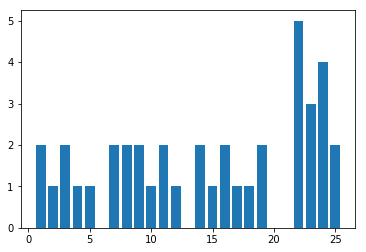

In [131]:
keys = []
values = []
for key, value in frequency_Mega.iteritems():
    keys.append(key)
    values.append(value)
plt.bar(keys, values)
plt.show()

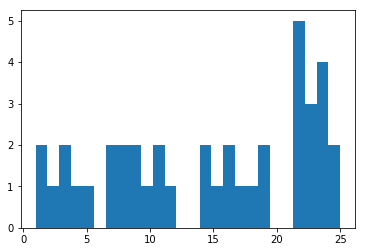

In [132]:
plt.hist(data_s.Mega, bins=26)
plt.show()

In [133]:
balls = data_s[['1', '2', '3', '4', '5']].values.flatten()
unique, counts = np.unique(balls, return_counts=True)

print(np.asarray((unique, counts)))

[[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
  26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48 49 50 51
  52 53 54 55 57 58 59 60 61 62 64 65 66 67 68 69 70]
 [ 7  1  4  4  1  5  3  1  6  2  3  2  5  2  4  8  3  2  2  2  4  5  3  2
   3  3  7  3  4  3  3  1  1  2  3  5  3  2  4  8  3  1  5  3  2  3  1  1
   2  2  2  2  2  7  3  5  4  1  3  1  2  2  1  2  4]]


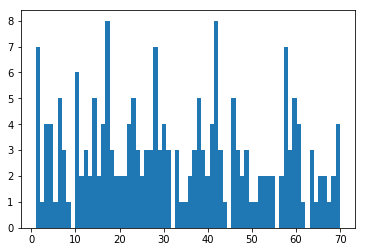

In [134]:
plt.hist(balls, bins = 70)
plt.show()

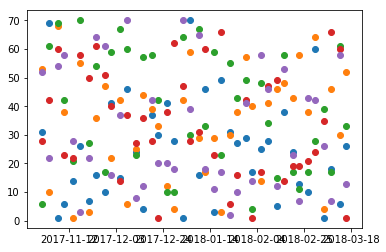

In [138]:
plt.plot(data_s[['1', '2', '3', '4', '5']],linestyle="",marker="o")
plt.show()

In [139]:
print(data_s[['1', '2', '3', '4', '5']].apply(sort))



NameError: name 'sort' is not defined